In [2]:
# IP_FL6
# 1. Design mean-shift algorithm
# 2016121150 윤준영

def gk(x):
### Gaussian kernel ###
### x : vector
  norm = np.linalg.norm(x)
  if norm <= 1 : return np.exp(-norm**2) 
  else : return 0

def dist(x,y):
### distance ###
### x, y = 1 x d array
  d = math.sqrt(sum((x-y)**2))
  return d  

def meanshift(df, h, plot=0):
### MEAN-SHIFT ALGORITHM ###
### INPUT - df : d-dim dataframe, h : kernel parameter
### OUTPUT - data label (0 ~ k-1)

  # make ndarray with dataframe
  x = df.iloc[:,:].values
  # n : no of samples, d : dimensions, y : current shifting point
  # v : convergence point, E = epsilon, c : cluster, z : center of cluster 
  n = x.shape[0]
  d = x.shape[1]
  y = np.zeros([n,d])
  v = np.zeros([n,d])
  E = h/1000
  c = np.zeros(n)
  z = np.zeros([n,d])

  ## find convergence point v
  for i in range(n):
    y[0] = x[i]
    t = 0
    e = E+1
    # calculate y[t+1] from y[t] and x[i]
    while(1):
      myu = np.zeros([1,d])
      myl = 0
      for j in range(n):
        s = (x[j]-y[t])/h  
        myu = myu + gk(s) * (x[j]-y[t])
        myl = myl + gk(s)
        if myl == 0 : y[t+1] = y[t]
        else : y[t+1] = y[t] + myu/myl
      e = dist(y[t],y[t+1])
      if e<E : break
      t = t+1
    # save convergence point to v
    v[i] = y[t+1]

  ## grouping v
  cn = np.copy(c)
  i = 0
  while(1):
    # pick random point of i cluster
    next = np.asarray(np.nonzero(c==i))[0,:].tolist()
    ran = sample(next,1)
    z[i] = v[ran]
    # regroup i cluster to i and i+1
    for j in next:
      if dist(v[j],z[i]) < h : cn[j] = i
      else : cn[j] = i+1
    # if there's no i+1 group; break
    if (c==cn).min() : break
    z[i] = x[cn==i].mean(axis=0)
    c = np.copy(cn)
    i = i+1

  ## plot (2d)
  if plot == 1 :
    plt.figure(figsize=(20,5))
    # plot original data
    plt.subplot(131)
    plt.scatter(x[:,0],x[:,1])
    plt.title('original')
    # plot convergent data
    plt.subplot(132)
    color = ["r", "g", "b", "c", "m", "y", "k", '0.3']
    for i in range(int(max(c))+1):
      plt.scatter(v[c==i,0],v[c==i,1], c=color[i])
    plt.title('convergence point')
    # plot sorted data
    plt.subplot(133)
    for i in range(int(max(c))+1):
      plt.scatter(x[c==i,0],x[c==i,1], c=color[i])
    plt.title('mean-shift')
    plt.show()

  return c

In [1]:
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import math
import cv2
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


    0   1
0  25  79
1  34  51
2  22  53
3  27  78
4  33  59


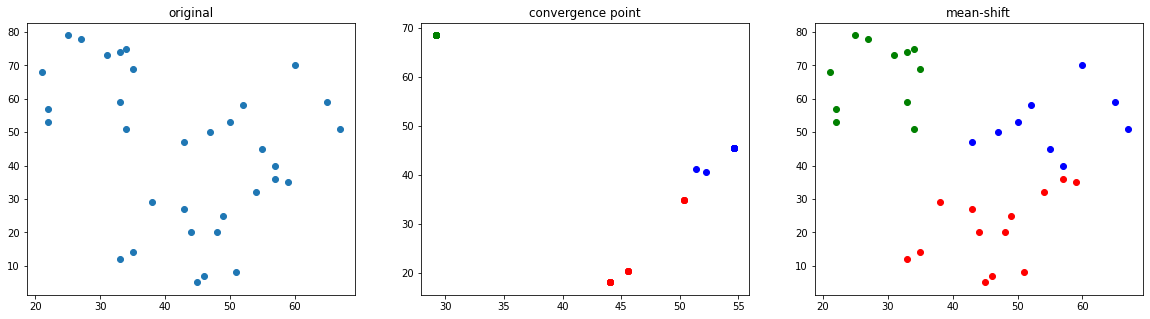

label =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 2. 2. 2. 0. 0. 2. 2. 2. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 1.]


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv',header=None, encoding='utf-8')
print(df.head())

label = meanshift(df, 20, plot=1)
print("label = ", label)